In [1]:
1+8

9

In [2]:
8+1

9

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [6]:
df=pd.read_csv("C:/Users/GOLU VERMA/Desktop/sachin's ppts/USA_Housing#.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df1=df.drop('Address',axis=1)

In [8]:
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
df1.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

In [10]:
import seaborn as sns

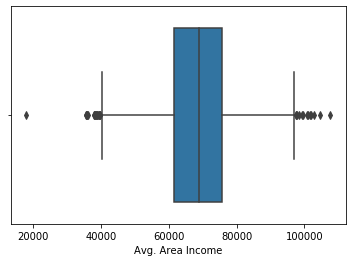

In [11]:
sns.boxplot(df1['Avg. Area Income'])

In [13]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
r_data=rs.fit_transform(df1)
r_data=pd.DataFrame(r_data)
r_data.columns=df1.columns
r_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.750985,-0.216456,0.004600,0.029630,-0.974382,-0.366604
1,0.730233,0.024441,-0.199090,-0.711111,0.295278,0.576863
2,-0.525578,-0.078688,1.104787,0.800000,0.050735,-0.366700
3,-0.381677,0.916661,-1.036259,-0.585185,-0.140381,0.059006
4,-0.616810,-0.699930,0.612083,0.133333,-0.731592,-1.270447


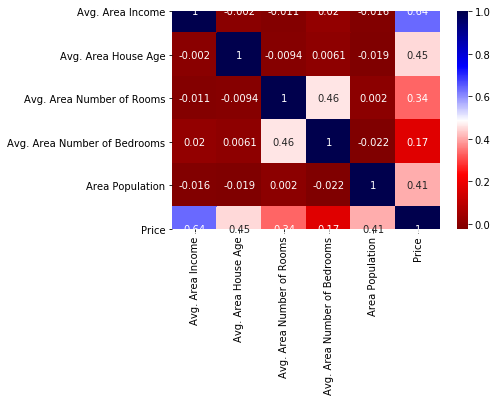

In [15]:
corr=r_data.corr()
sns.heatmap(corr,annot=True,cmap='seismic_r')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
x=r_data.iloc[:,:-1]
y=r_data.iloc[:,-1]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

In [24]:
y_pred=reg.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
score=r2_score(y_test,y_pred)
score

0.9146454505138086